# Table of Contents

1) Sequence Analysis (Handling DNA, RNA and Protein Sequences)

2) Protein Synthesis

3) DNA Composition - GC and AT Content

4) Checking for Similarities using Hamming Distance and K-mer Distance

5) K-mers and K-mer Frequency

6) Sequence Alignments

7) Working with FASTA and GenBank File Formats

8) Phylogenetics with Newick format



In [1]:
#Load Packages
import skbio

In [3]:
#Methods and Attributes
dir(skbio)

## 1) Sequence Analysis

In [4]:
from skbio import DNA,RNA, Sequence #Can construct sequences for any of these

In [19]:
#Create a generic sequence
seq1 = Sequence("ATGATCTCGTAA")
seq1
#str(seq1) #see without metadata

Sequence
---------------
Stats:
    length: 12
---------------
0 ATGATCTCGT AA

In [42]:
#Create a DNA sequence
dna_seq = DNA("ATGATCTCGTAA")
dna_seq
#dir(dna_seq)

DNA
--------------------------
Stats:
    length: 12
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 33.33%
--------------------------
0 ATGATCTCGT AA

In [13]:
#Automatically generate some Metadata and Stats
d = DNA('ACCGGGTA', metadata={'id':"my-sequence", 'description':"GFP"},
         positional_metadata={'quality':[22, 25, 22, 18, 23, 25, 25, 25]})
d

DNA
-----------------------------
Metadata:
    'description': 'GFP'
    'id': 'my-sequence'
Positional metadata:
    'quality': <dtype: int64>
Stats:
    length: 8
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 62.50%
-----------------------------
0 ACCGGGTA

In [14]:
#See alphabet of sequence
dna_seq.alphabet

{'-',
 '.',
 'A',
 'B',
 'C',
 'D',
 'G',
 'H',
 'K',
 'M',
 'N',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y'}

In [17]:
#Convert to numpy array of Nucleotides
print(dna_seq)

dna_seq.values

ATGATCTCGTAA


array([b'A', b'T', b'G', b'A', b'T', b'C', b'T', b'C', b'G', b'T', b'A',
       b'A'], dtype='|S1')

In [23]:
#Reverse Complement

#Original sequence
print(f"Dna Sequence: {dna_seq}")

#Complement
print(f"Complement: {dna_seq.complement()}")

#Reverse Complement
print(f"Reverse Complement: {dna_seq.reverse_complement()}")


Dna Sequence: ATGATCTCGTAA
Complement: TACTAGAGCATT
Reverse Complement: TTACGAGATCAT


In [24]:
#Check if the generated sequence is actually the reverse complement - Boolean value
dna_seq.reverse_complement().is_reverse_complement(dna_seq)

True

In [25]:
#Count of nucleotide
dna_seq.count("G")

2

In [26]:
#Position of Nucleotide
dna_seq.index("T")

1

In [27]:
#Slice a sequence
dna_seq[0:3]

DNA
--------------------------
Stats:
    length: 3
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 33.33%
--------------------------
0 ATG

In [32]:
# Searched for arbitrary patterns using regular expressions
for match in dna_seq.find_with_regex('(ATG+)'):
    print(match)
    print(str(dna_seq[match]))

slice(0, 3, None)
ATG


In [33]:
#Search for Biologically significant Motifs

#Structural motif - formed by 3d arrangements of amino acids that may or may not be adjacent
#Sequence motif - conserved sequences of similar or identical patterns that may occur in nucleic acid or proteins

for motif_slice in dna_seq.find_motifs('purine-run', min_length=2): #Search for only purine runs
    print(motif_slice)
    print(str(dna_seq[motif_slice]))

slice(2, 4, None)
GA
slice(10, 12, None)
AA


## 2) Protein Synthesis

In [43]:
from skbio import Protein

In [35]:
dna_seq

DNA
--------------------------
Stats:
    length: 12
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 33.33%
--------------------------
0 ATGATCTCGT AA

In [42]:
#Original DNA sequence
print(f"Original DNA: {dna_seq}")

#Transcription DNA -> mRNA
print(f"Transcription gives: {dna_seq.transcribe()}")

#Transcribe mRNA -> Amino Acids
print(f"Translation gives: {dna_seq.translate()}") #Methionine, Isoleucine , Serine

Original DNA: ATGATCTCGTAA
Transcription gives: AUGAUCUCGUAA
Translation gives: MIS*


In [47]:
#Create Protein Sequence from Scratch
protein_a = Protein('MITITV')
protein_a
#dir(protein_a)

Protein
--------------------------
Stats:
    length: 6
    has gaps: False
    has degenerates: False
    has definites: True
    has stops: False
--------------------------
0 MITITV

# 3) DNA Composition - GC and AT Content

In [50]:
#Note the GC content is automatically returned !!
dna_seq

DNA
--------------------------
Stats:
    length: 12
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 33.33%
--------------------------
0 ATGATCTCGT AA

## GC

In [55]:
#Get GC Content alone as a percentage compared to the whole sequence
dna_seq.gc_content()*100

33.33333333333333

In [59]:
#Custom GC content function
def custom_gc_content(dna_seq):
    return float(dna_seq.count('G') + dna_seq.count('C'))/len(dna_seq)*100

custom_gc_content(dna_seq)

33.33333333333333

In [53]:
#Get GC Frequency - Count number of G and C in sequence
dna_seq.gc_frequency()

4

In [73]:
#Custom GC frequency function
def custom_gc_frequency(dna_seq):
    return dna_seq.count('G') + dna_seq.count('C')

custom_gc_frequency(dna_seq)

4

## AT (no module, must create custom functions)

In [78]:
#Custom AT content function
def custom_at_content(dna_seq):
    return float(dna_seq.count('A') + dna_seq.count('T'))/len(dna_seq)*100

custom_at_content(dna_seq)

66.66666666666666

In [79]:
#Custom AT frequency function
def custom_at_frequency(dna_seq):
    return dna_seq.count('A') + dna_seq.count('T')

custom_at_frequency(dna_seq)

8

## Get frequency of each nucleotide

In [80]:
dna_seq.frequencies()

{'A': 4, 'C': 2, 'G': 2, 'T': 4}

In [85]:
#Custom 
from collections import Counter
Counter(str(dna_seq))

Counter({'A': 4, 'T': 4, 'G': 2, 'C': 2})

<BarContainer object of 4 artists>

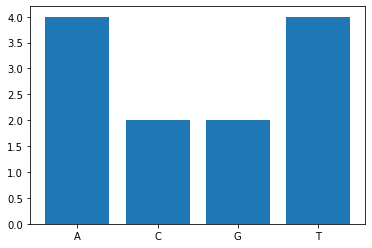

In [88]:
#Plot each nucleotide's frequency
import matplotlib.pyplot as plt

plt.bar(dna_seq.frequencies().keys(), dna_seq.frequencies().values())

In [43]:
#Check for frequency of a particular nucleotide 
dna_seq.frequencies(chars = {'A','C'})

{'A': 4, 'C': 2}

# 4) Checking for Similarities using Hamming Distance and K-mer Distance

Uses: 

check dissimilarity

sequence clustering 

phylogenetic reconstruction

mismatch and match frequency

## Kmer Distance

fraction of kmers that are unique to either sequence (find kmers that are not found in each sequence or are dissimilar in each)

sum of non-intersection

nb: L-k+1 kmers and n^k possible kmers

Uses: 

assemble DNA sequences

improve heterologous gene expression

identify species in metagenomics

create attenuated (vaccine created by reducing the virulence of a pathogen, but still keeping it viable (or "live")) vaccines

In [2]:
from skbio import DNA

In [3]:
seq1 = DNA("ACTATCAGT")
seq2 = DNA("ACTTACAGT")

In [6]:
#Calculate matches and mismatches
seq1.match_frequency(seq2) #7

#Calculate match only as booleans
seq1.matches(seq2) #array([ True,  True,  True, False, False,  True,  True,  True,  True])

#Calculate mismatch only as booleans
seq1.mismatches(seq2) #array([False, False, False,  True,  True, False, False, False, False])



array([False, False, False,  True,  True, False, False, False, False])

## Hamming Distance

In [11]:
from skbio.sequence.distance import hamming

In [12]:
#Get hamming distance
hamming(seq1,seq2)

0.2222222222222222

In [7]:
# OR without importing hamming
seq1.distance(seq2) 

0.2222222222222222

In [8]:
#Custom Hamming Distance function
def custom_hamming_distance(seq1,seq2):
    return len([(x,y) for x,y in zip(seq1,seq2) if x != y])

custom_hamming_distance(seq1,seq2)

2

## K-mer Distance -  dissimilarity

In [10]:
from skbio.sequence.distance import kmer_distance

In [16]:
print(seq1.kmer_frequencies(3))
print(seq2.kmer_frequencies(3))

#In total we see 8 differences (4 on each sequence)

{'ACT': 1, 'CTA': 1, 'TAT': 1, 'ATC': 1, 'TCA': 1, 'CAG': 1, 'AGT': 1}
{'ACT': 1, 'CTT': 1, 'TTA': 1, 'TAC': 1, 'ACA': 1, 'CAG': 1, 'AGT': 1}


In [19]:
#Get K-mer distance
kmer_distance(seq1,seq2,3) 

0.7272727272727273

In [37]:
#Custom k-mer function
#Set, Intersection, Dissimilar
def custom_kmer_function(seq1,seq2):
    seq1_set = set(seq1)
    seq2_set = set(seq2)

    #dissimilarity = union - intersection

    union_sequence = seq1_set.union(seq2_set)
    intersection_sequence = seq1_set.intersection(seq2_set)

    dissimilarity = len(union_sequence) - len(intersection_sequence)

    print(f"Dissimilarity: {dissimilarity}")

    distance = dissimilarity / len(union_sequence)

    print(f"K-mer Distance: {distance}")

seq1_values = seq1.kmer_frequencies(3).keys()
seq2_values = seq2.kmer_frequencies(3).keys()

custom_kmer_function(seq1_values,seq2_values)

Dissimilarity: 8
K-mer Distance: 0.7272727272727273


In [38]:
#Smaller custom function without using intersection concretely
def custom_kmer_function_smaller(seq1,seq2):
    seq1_set = set(seq1)
    seq2_set = set(seq2)
    
    union_sequence = seq1_set.union(seq2_set)

    dissimilarity_smaller = seq1_set ^ seq2_set #caret - see all kmers that do not match between each     string at corresponding positions
    
    print(f"Dissimilarity: {dissimilarity_smaller}")

    distance = len(dissimilarity_smaller) / len(union_sequence)

    print(f"K-mer Distance: {distance}")

seq1_values = seq1.kmer_frequencies(3).keys()
seq2_values = seq2.kmer_frequencies(3).keys()

custom_kmer_function_smaller(seq1_values,seq2_values)

Dissimilarity: {'TAT', 'TAC', 'TTA', 'CTT', 'ATC', 'ACA', 'CTA', 'TCA'}
K-mer Distance: 0.7272727272727273


In [39]:
# OR using Symmetric Difference to see all kmers that do not match between each string at corresponding positions
print(set(seq1_values).symmetric_difference(seq2_values))
len(set(seq1_values).symmetric_difference(seq2_values))

{'TAT', 'TAC', 'TTA', 'CTT', 'ATC', 'ACA', 'CTA', 'TCA'}


8

## 5) K-mers and K-mer Frequency

In [46]:
#Working with k-mers
print(dna_seq)
#first 3-kmer = ATG .....

#Find K-mers 
dna_seq.kmer_frequencies(3)

ATGATCTCGTAA


{'ATG': 1,
 'TGA': 1,
 'GAT': 1,
 'ATC': 1,
 'TCT': 1,
 'CTC': 1,
 'TCG': 1,
 'CGT': 1,
 'GTA': 1,
 'TAA': 1}

In [54]:
#Custom kmer function
#L = sequence, K = kmer length desired
#total is L-K+1

def custom_count_kmers(seq, k):
    counts = {}
    number_of_kmers = len(seq) - k + 1

    for i in range(number_of_kmers):
        #Slicing the sequence to get particular k-mer
        kmer = seq[i:i+k]
        if kmer not in counts:
            counts[kmer] = 0
        
        #Increment to only add kmers not already in dictionary counts
        counts[kmer] += 1 
    
    return counts

custom_count_kmers(str(dna_seq),k=3)

{'ATG': 1,
 'TGA': 1,
 'GAT': 1,
 'ATC': 1,
 'TCT': 1,
 'CTC': 1,
 'TCG': 1,
 'CGT': 1,
 'GTA': 1,
 'TAA': 1}

In [56]:
#Iteration to find all kmers
for k in dna_seq.iter_kmers(3, overlap = True):
    print(k)

ATG
TGA
GAT
ATC
TCT
CTC
TCG
CGT
GTA
TAA


<BarContainer object of 37 artists>

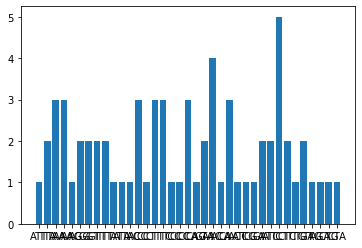

In [59]:
#Plot kmer frequency
import matplotlib.pyplot as plt

dna_seq_plot = DNA("ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA")

plt.bar(dna_seq_plot.kmer_frequencies(3).keys(), dna_seq_plot.kmer_frequencies(3).values())

## 6) Sequence Alignments

In [63]:
import skbio.alignment as align
#dir(align)

In [66]:
seq3 = DNA("ACTTAC")
print(seq1)
print(seq3)

ACTATCAGT
ACTTAC


## Local Alignment (gaps are not depicted)

In [71]:
#StripedSmithWaterman method
local_alignment, local_score, local_start_end_positions = align.local_pairwise_align_ssw(seq1,seq3)

print(local_alignment)
print('\n')
print(local_score)
print(local_start_end_positions)

TabularMSA[DNA]
---------------------
Stats:
    sequence count: 2
    position count: 3
---------------------
ACT
ACT


6
[(0, 2), (0, 2)]


## Global Alignment (gaps are counted)

In [72]:
global_alignment, global_score, global_start_end_positions = align.global_pairwise_align_nucleotide(seq1,seq3)



C:\Users\18687\AppData\Local\Programs\Python\Python39\lib\site-packages\skbio\alignment\_pairwise.py:595: EfficiencyWarning: You're using skbio's python implementation of Needleman-Wunsch alignment. This is known to be very slow (e.g., thousands of times slower than a native C implementation). We'll be adding a faster version soon (see https://github.com/biocore/scikit-bio/issues/254 to track progress on this).
  warn("You're using skbio's python implementation of Needleman-Wunsch "


In [73]:
print(global_alignment)
print('\n')
print(global_score)
print(global_start_end_positions)

TabularMSA[DNA]
----------------------
Stats:
    sequence count: 2
    position count: 13
----------------------
----ACTATCAGT
ACTTAC-------


2.0
[(0, 8), (0, 5)]


## Comparing Protein Sequence Alignment

In [74]:
from skbio import Protein

In [77]:
p1 = Protein("MITITV")
p2 = Protein("ITITV")

In [79]:
align.local_pairwise_align_protein(p1,p2)

C:\Users\18687\AppData\Local\Programs\Python\Python39\lib\site-packages\skbio\alignment\_pairwise.py:318: EfficiencyWarning: You're using skbio's python implementation of Smith-Waterman alignment. This will be very slow (e.g., thousands of times slower) than skbio.alignment.local_pairwise_align_ssw.
  warn("You're using skbio's python implementation of Smith-Waterman "


(TabularMSA[Protein]
 ---------------------
 Stats:
     sequence count: 2
     position count: 5
 ---------------------
 ITITV
 ITITV,
 25.0,
 [(1, 5), (0, 4)])

In [80]:
align.global_pairwise_align_protein(p1,p2)

C:\Users\18687\AppData\Local\Programs\Python\Python39\lib\site-packages\skbio\alignment\_pairwise.py:595: EfficiencyWarning: You're using skbio's python implementation of Needleman-Wunsch alignment. This is known to be very slow (e.g., thousands of times slower than a native C implementation). We'll be adding a faster version soon (see https://github.com/biocore/scikit-bio/issues/254 to track progress on this).
  warn("You're using skbio's python implementation of Needleman-Wunsch "


(TabularMSA[Protein]
 ---------------------
 Stats:
     sequence count: 2
     position count: 6
 ---------------------
 MITITV
 -ITITV,
 25.0,
 [(0, 5), (0, 4)])

# 7) Working with FASTA and GenBank File Formats

In [2]:
import skbio.io

## FASTA

In [6]:
#Reading a FASTA file METHOD 1
seq_file = skbio.io.read(r"C:\Users\18687\Desktop\Bio Informatics\Bioinformatics with Python Packages\Scikit-Bio\sckit-bio\SARS_complete_genome.fasta", format = "fasta")

In [10]:
#Get sequence
print(seq_file)
for i in seq_file:
    pass
    #print(i) - very long sequence

<generator object IORegistry.read.<locals>.<genexpr> at 0x0000023D03C08F20>


In [12]:
#Reading a FASTA file METHOD 2 - directly into a sequence
from skbio import DNA, Sequence
seq_file_direct = Sequence.read(r"C:\Users\18687\Desktop\Bio Informatics\Bioinformatics with Python Packages\Scikit-Bio\sckit-bio\SARS_complete_genome.fasta")
seq_file_direct

Sequence
-----------------------------------------------------------------------
Metadata:
    'description': 'Severe acute respiratory syndrome coronavirus 2
                    isolate Wuhan-Hu-1, complete genome'
    'id': 'MN908947.3'
Stats:
    length: 29903
-----------------------------------------------------------------------
0     ATTAAAGGTT TATACCTTCC CAGGTAACAA ACCAACCAAC TTTCGATCTC TTGTAGATCT
60    GTTCTCTAAA CGAACTTTAA AATCTGTGTG GCTGTCACTC GGCTGCATGC TTAGTGCACT
...
29820 TTTAGTAGTG CTATCCCCAT GTGATTTTAA TAGCTTCTTA GGAGAATGAC AAAAAAAAAA
29880 AAAAAAAAAA AAAAAAAAAA AAA

## GenBank

In [16]:
#Read GenBank directly into sequence

seq_file_genbank = DNA.read(r"C:\Users\18687\Desktop\Bio Informatics\Bioinformatics with Python Packages\Scikit-Bio\sckit-bio\SARS_complete_genome.gb")
seq_file_genbank

DNA
-----------------------------------------------------------------------
Metadata:
    'ACCESSION': 'MN908947'
    'COMMENT': <class 'str'>
    'DEFINITION': 'Severe acute respiratory syndrome coronavirus 2
                   isolate Wuhan-Hu-1, complete genome.'
    'KEYWORDS': '.'
    'LOCUS': <class 'dict'>
    'REFERENCE': <class 'list'>
    'SOURCE': <class 'dict'>
    'VERSION': 'MN908947.3'
Interval metadata:
    23 interval features
Stats:
    length: 29903
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 37.97%
-----------------------------------------------------------------------
0     ATTAAAGGTT TATACCTTCC CAGGTAACAA ACCAACCAAC TTTCGATCTC TTGTAGATCT
60    GTTCTCTAAA CGAACTTTAA AATCTGTGTG GCTGTCACTC GGCTGCATGC TTAGTGCACT
...
29820 TTTAGTAGTG CTATCCCCAT GTGATTTTAA TAGCTTCTTA GGAGAATGAC AAAAAAAAAA
29880 AAAAAAAAAA AAAAAAAAAA AAA

## NCBI

In [18]:
species_mit = skbio.sequence.GeneticCode.from_ncbi(21) #Particular ID from NCBI
species_mit

GeneticCode (Trematode Mitochondrial)
-------------------------------------------------------------------------
  AAs  = FFLLSSSSYY**CCWWLLLLPPPPHHQQRRRRIIMMTTTTNNNKSSSSVVVVAAAADDEEGGGG
Starts = -----------------------------------M---------------M------------
Base1  = UUUUUUUUUUUUUUUUCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAGGGGGGGGGGGGGGGG
Base2  = UUUUCCCCAAAAGGGGUUUUCCCCAAAAGGGGUUUUCCCCAAAAGGGGUUUUCCCCAAAAGGGG
Base3  = UCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAG

# 8) Phylogenetics with Newick format

 ### Phylogenetics
+ Phylogenetics: study of evolutionary history and relationships among entities
+ A Phylo Tree/Evolutionary Tree is a branching diagram or tree showing the evolutionary relationships among various
species or entities based on similarity and differences in their physical or genetic characteristics

+ Newick Format
+ Nexus
+ PhyloXML

#### Terms
+ (;)The semi-colon creates a root node to its left. 
    - Recall that there can only be one root in a tree.
+ (,)The comma which creates a node to its right. 
+  (( )) The paired parenthesis provide  relationships,
+ Placing ( ) in a node’s location will create a child inside the parenthesis on the left-most inner edge.
+ children <= node <= root

+ "((grand_child, grand_child)Brother, Children)rootParent;"
+ "((Enoch,Awan)Seth,Cain,Abel)Adam;"



In [25]:
from skbio import TreeNode
from io import StringIO

In [27]:
#Examining the evolutionary history of Noah whom built the ark!
noah_tree = TreeNode.read(StringIO("((Magog,Madia,Javan, Gomer)Japheth,(Israel,Arphaxad)Shem,(Cush,Egypt,Phut,Canaan)Ham)root;"))

#his siblings were Japheth, Shem and Ham who branched their genetics out (had children)

In [28]:
#Check if this is a root
noah_tree.is_root() #T

#Check if it is a tip
noah_tree.is_tip() #F

True

In [31]:
#Visualize my Phylogenetic Tree as Dendrogram
print(noah_tree.ascii_art())

#reference against noahfamilytree.jpg

                    /-Magog
                   |
                   |--Madia
          /Japheth-|
         |         |--Javan
         |         |
         |          \-Gomer
         |
         |          /-Israel
-root----|-Shem----|
         |          \-Arphaxad
         |
         |          /-Cush
         |         |
         |         |--Egypt
          \Ham-----|
                   |--Phut
                   |
                    \-Canaan


In [32]:
#Check for children
noah_tree.children

[<TreeNode, name: Japheth, internal node count: 0, tips count: 4>,
 <TreeNode, name: Shem, internal node count: 0, tips count: 2>,
 <TreeNode, name: Ham, internal node count: 0, tips count: 4>]

In [ ]:
#total nodes (including rightmost nodes which are leaves and leftmost node which is root)
noah_tree.count()

In [35]:
#Common ancestor
noah_tree.lowest_common_ancestor

<bound method TreeNode.lowest_common_ancestor of <TreeNode, name: root, internal node count: 3, tips count: 10>>

## Custom Phylogenetic Tree

In [36]:
#Children inside the bracket - Adam is the root node, seth has children enoch and awan, enoch had methu etc
"(Cain,Abel,((Methu)Enoch,Awan)Seth)Adam;"
adam_tree = TreeNode.read(StringIO("(Cain,Abel,((Methu)Enoch,Awan)Seth)Adam;"))

In [37]:
print(adam_tree.ascii_art())

          /-Cain
         |
-Adam----|--Abel
         |
         |          /Enoch--- /-Methu
          \Seth----|
                    \-Awan


## Using Newick

```python
>>> from io import StringIO
>>> from skbio import read
>>> from skbio.tree import TreeNode
>>> f = StringIO("((D, E)B, (F, G)C)A;")
>>> tree = read(f, format="newick", into=TreeNode)
>>> f.close()
>>> print(tree.ascii_art())
                    /-D
          /B-------|
         |          \-E
-A-------|
         |          /-F
          \C-------|
                    \-G
                     
## Method 2
>>> from io import StringIO
>>> from skbio import read
>>> from skbio.tree import TreeNode
>>> f = StringIO("((D, E)B, (F, G)C)A;")
>>> tree = read(f, format="newick", into=TreeNode)
>>> f.close()
>>> print(tree.ascii_art())
                    /-D
          /B-------|
         |          \-E
-A-------|
         |          /-F
          \C-------|
                    \-G                    
            
```